In [1]:
#Evaluate the skill of the Brown and Dowdy (2021) logistic regression model (bdsd) for SCW prediction in each environmental cluster.
#Compare this skill to a model trained on each cluster separately. Variables for this model were chosen by fwd_selection.py, using all null events

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from skill_test import resample_test, remove_suspect_gusts, load_scws, load_nulls
import tqdm
import numpy as np
import seaborn as sns

In [13]:
#Load the SCW dataset and null events for all 20 radar domains. Load the relevant environmental data for the new logit models, and the bdsd

var = ["bdsd","scw","cluster",
       "Umean03","sb_el","rhmin13","lr24","U10",
       "Uwindinf","lr13","pwat","ml_cin","ebwd",
       "srhe_left","lr03","rhmin03","rhmin01","srh03_left",
       "dpd700","Umean06","ml_cape"]

rids = ["2","66","69","70","71","64","8","72","75","19","73","78","49","4","40","48","68","63","76","77"]
df_scw = pd.DataFrame()
df_null = pd.DataFrame()
for rid in tqdm.tqdm(rids):
    df_scw = pd.concat([df_scw,remove_suspect_gusts(load_scws(rid))[var]],axis=0)
    df_null = pd.concat([df_null,load_nulls(rid)[var]],axis=0)

100%|██████████| 20/20 [04:02<00:00, 12.11s/it]


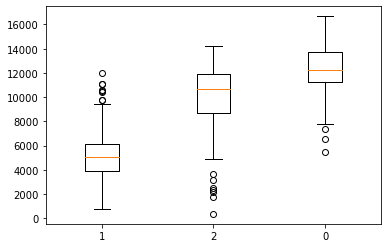

In [28]:
plt.boxplot([df_scw.query("cluster==1").sb_el,df_scw.query("cluster==2").sb_el,df_scw.query("cluster==0").sb_el]);
plt.xticks([1,2,3],["1","2","0"]);

In [104]:
#Perform a 1000-time random balanced resampling of the SCW events and null events, for each cluster separately, and all clusters combined

#For each subset, calculate the new logit model, and the AUC score. Calculate the BDSD AUC score as well

def calc_logit_all(ds, coef_df):
    ds["logit_all"] = 1 /\
                   ( 1 + np.exp( -(coef_df.loc["ebwd","coef"]*ds["ebwd"] +\
                                   coef_df.loc["lr03","coef"]*ds["lr03"] +\
                                   coef_df.loc["dpd700","coef"]*ds["dpd700"] +\
                                   coef_df.loc["Umean06","coef"]*ds["Umean06"] +\
                                   coef_df.loc["ml_cape","coef"]*ds["ml_cape"] +\
                                   coef_df.loc["lr13","coef"]*ds["lr13"] +\
                                   coef_df.loc["const","coef"] ) ) )
    return ds

def calc_logit_0(ds, coef_df):
    ds["logit_0"] = 1 /\
                   ( 1 + np.exp( -(coef_df.loc["Umean03","coef"]*ds["Umean03"] +\
                                   coef_df.loc["sb_el","coef"]*ds["sb_el"] +\
                                   coef_df.loc["rhmin13","coef"]*ds["rhmin13"] +\
                                   coef_df.loc["lr24","coef"]*ds["lr24"] +\
                                   coef_df.loc["U10","coef"]*ds["U10"] +\
                                   coef_df.loc["const","coef"] ) ) )
    return ds

def calc_logit_1(ds, coef_df):
    ds["logit_1"] = 1 /\
                   ( 1 + np.exp( -(coef_df.loc["Uwindinf","coef"]*ds["Uwindinf"] +\
                                   coef_df.loc["lr13","coef"]*ds["lr13"] +\
                                   coef_df.loc["pwat","coef"]*ds["pwat"] +\
                                   coef_df.loc["U10","coef"]*ds["U10"] +\
                                   coef_df.loc["rhmin13","coef"]*ds["rhmin13"] +\
                                   coef_df.loc["ml_cin","coef"]*ds["ml_cin"] +\
                                   coef_df.loc["ebwd","coef"]*ds["ebwd"] +\
                                   coef_df.loc["const","coef"] ) ) )
    return ds

def calc_logit_2(ds, coef_df):
    ds["logit_2"] = 1 /\
                   ( 1 + np.exp( -(coef_df.loc["srhe_left","coef"]*ds["srhe_left"] +\
                                   coef_df.loc["lr03","coef"]*ds["lr03"] +\
                                   coef_df.loc["rhmin03","coef"]*ds["rhmin03"] +\
                                   coef_df.loc["rhmin01","coef"]*ds["rhmin01"] +\
                                   coef_df.loc["srh03_left","coef"]*ds["srh03_left"] +\
                                   coef_df.loc["const","coef"] ) ) )
    return ds

df_scw = calc_logit_all(df_scw, pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/logit_fwd_sel_cluster_all_null_frac_None_seed_0.csv",index_col=0))
df_scw = calc_logit_0(df_scw, pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/logit_fwd_sel_cluster_0_null_frac_None_seed_0.csv",index_col=0))
df_scw = calc_logit_1(df_scw, pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/logit_fwd_sel_cluster_1_null_frac_None_seed_0.csv",index_col=0))
df_scw = calc_logit_2(df_scw, pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/logit_fwd_sel_cluster_2_null_frac_None_seed_0.csv",index_col=0))
df_null = calc_logit_all(df_null, pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/logit_fwd_sel_cluster_all_null_frac_None_seed_0.csv",index_col=0))
df_null = calc_logit_0(df_null, pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/logit_fwd_sel_cluster_0_null_frac_None_seed_0.csv",index_col=0))
df_null = calc_logit_1(df_null, pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/logit_fwd_sel_cluster_1_null_frac_None_seed_0.csv",index_col=0))
df_null = calc_logit_2(df_null, pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/logit_fwd_sel_cluster_2_null_frac_None_seed_0.csv",index_col=0))

In [111]:
df_scw1 = df_scw.query("cluster==1")
df_scw2 = df_scw.query("cluster==2")
df_scw3 = df_scw.query("cluster==0")
df_null1 = df_null.query("cluster==1")
df_null2 = df_null.query("cluster==2")
df_null3 = df_null.query("cluster==0")

auc, _, auc1, _, auc2, _, auc3, _ = \
        resample_test(df_scw, df_scw1, df_scw2, df_scw3, df_null, df_null1, df_null2, df_null3, "AUC", 1000, ["bdsd","logit_all","logit_0","logit_1","logit_2"])

100%|██████████| 5/5 [01:12<00:00, 14.49s/it]


In [112]:
#Plot the AUC distributions for each model

logit_all    0.970887
bdsd         0.965645
logit_0      0.955900
logit_1      0.954457
logit_2      0.894931
dtype: float64

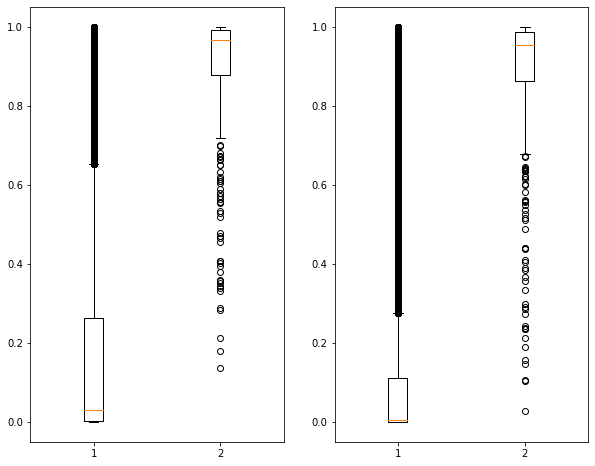

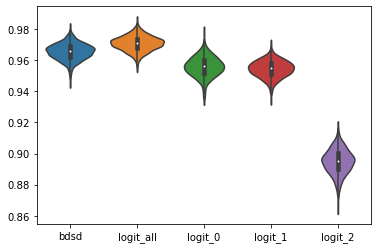

In [113]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.boxplot([df_null.bdsd,df_scw.bdsd]);
plt.subplot(1,2,2)
plt.boxplot([df_null.logit_all,df_scw.logit_all]);

plt.figure()
sns.violinplot(data=auc)

auc.mean().sort_values(ascending=False)

logit_0      0.983671
logit_all    0.979265
bdsd         0.977652
logit_1      0.972368
logit_2      0.906119
dtype: float64

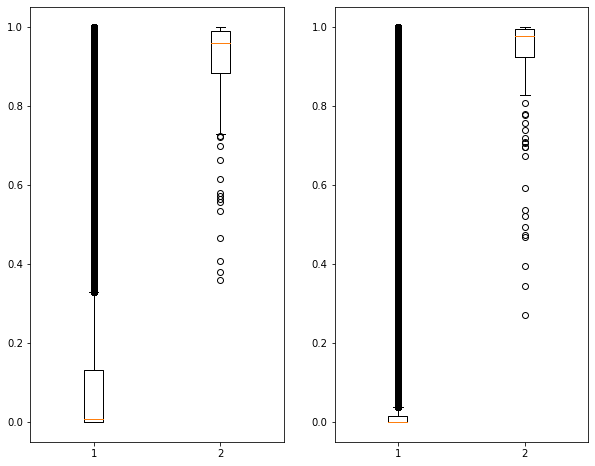

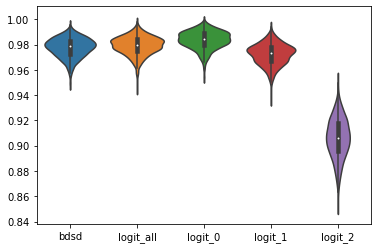

In [114]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.boxplot([df_null1.bdsd,df_scw1.bdsd]);
plt.subplot(1,2,2)
plt.boxplot([df_null1.logit_0,df_scw1.logit_0]);

plt.figure()
sns.violinplot(data=auc1)

auc1.mean().sort_values(ascending=False)

logit_1      0.964075
logit_all    0.946514
bdsd         0.944824
logit_0      0.941873
logit_2      0.855346
dtype: float64

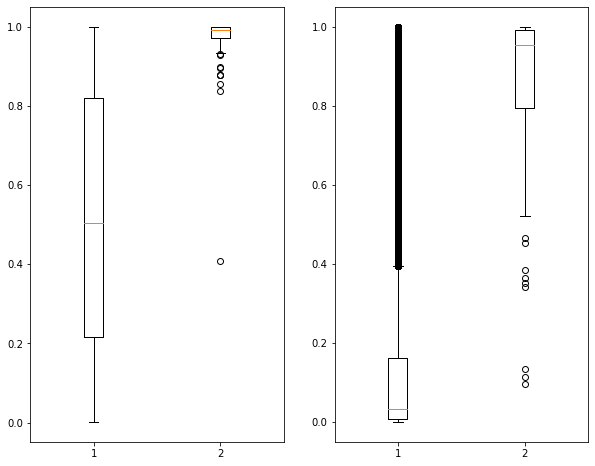

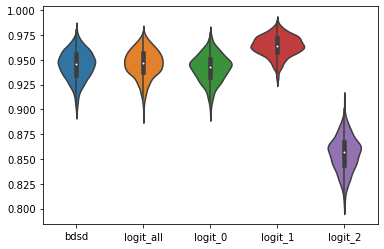

In [115]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.boxplot([df_null2.bdsd,df_scw2.bdsd]);
plt.subplot(1,2,2)
plt.boxplot([df_null2.logit_1,df_scw2.logit_1]);

plt.figure()
sns.violinplot(data=auc2)

auc2.mean().sort_values(ascending=False)

logit_all    0.965893
logit_1      0.961011
bdsd         0.957954
logit_2      0.946062
logit_0      0.923284
dtype: float64

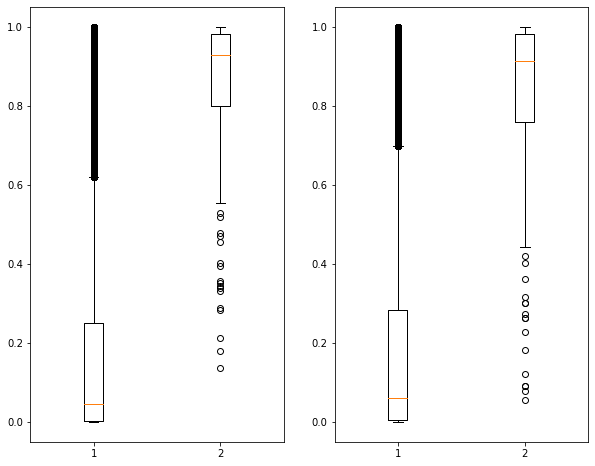

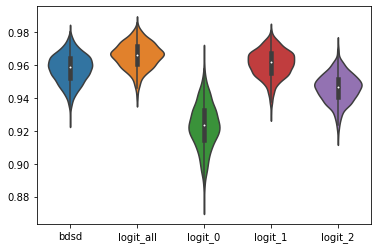

In [116]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.boxplot([df_null3.bdsd,df_scw3.bdsd]);
plt.subplot(1,2,2)
plt.boxplot([df_null3.logit_2,df_scw3.logit_2]);

plt.figure()
sns.violinplot(data=auc3)

auc3.mean().sort_values(ascending=False)

In [121]:
df_null[["bdsd","logit_all"]].sum() / 365

bdsd         5912.905381
logit_all    4069.169496
dtype: float64